   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  churned  
0        101348.88        1  
1        112542.58        0  
2        113931.57        1  
3         93826.63        0  
4       

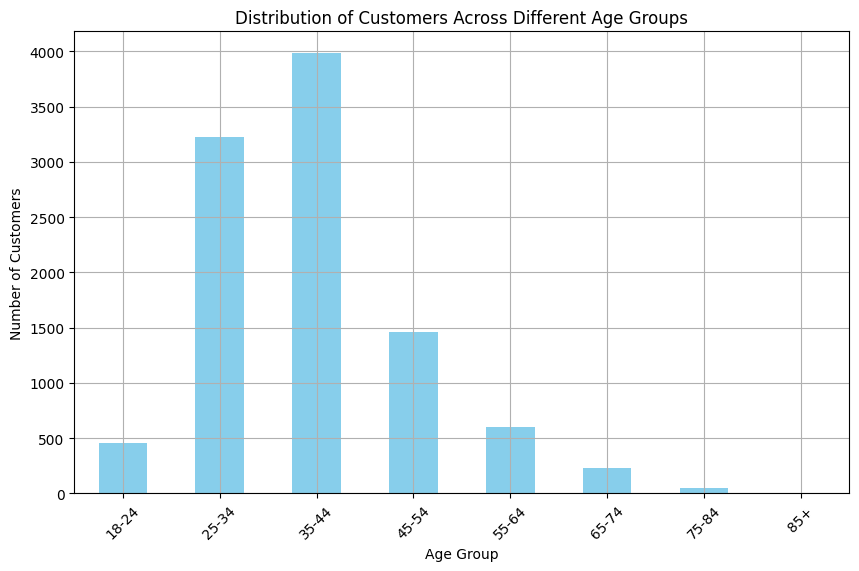

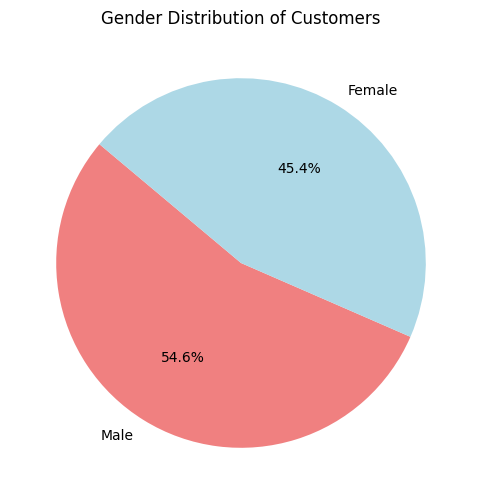

Distribution of Customers Across Different Age Groups:
Age Group
18-24     457
25-34    3222
35-44    3981
45-54    1458
55-64     600
65-74     228
75-84      50
85+         4
Name: count, dtype: int64

Gender Distribution of Customers:
Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = 'P3- Churn-Modelling Data.xlsx'

# Read the Excel data into a DataFrame
churn_data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
print(churn_data.head())

# Distribution of customers across different age groups
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 95]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']
churn_data['Age Group'] = pd.cut(churn_data['Age'], bins=age_bins, labels=age_labels, right=False)

age_group_distribution = churn_data['Age Group'].value_counts().sort_index()

# Plot the distribution of customers across different age groups
plt.figure(figsize=(10, 6))
age_group_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Analyze the gender distribution of customers
gender_distribution = churn_data['Gender'].value_counts()

# Plot the gender distribution of customers
plt.figure(figsize=(6, 6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution of Customers')
plt.ylabel('')
plt.show()

# Output the results
print("Distribution of Customers Across Different Age Groups:")
print(age_group_distribution)
print("\nGender Distribution of Customers:")
print(gender_distribution)


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  churned  
0        101348.88        1  
1        112542.58        0  
2        113931.57        1  
3         93826.63        0  
4       

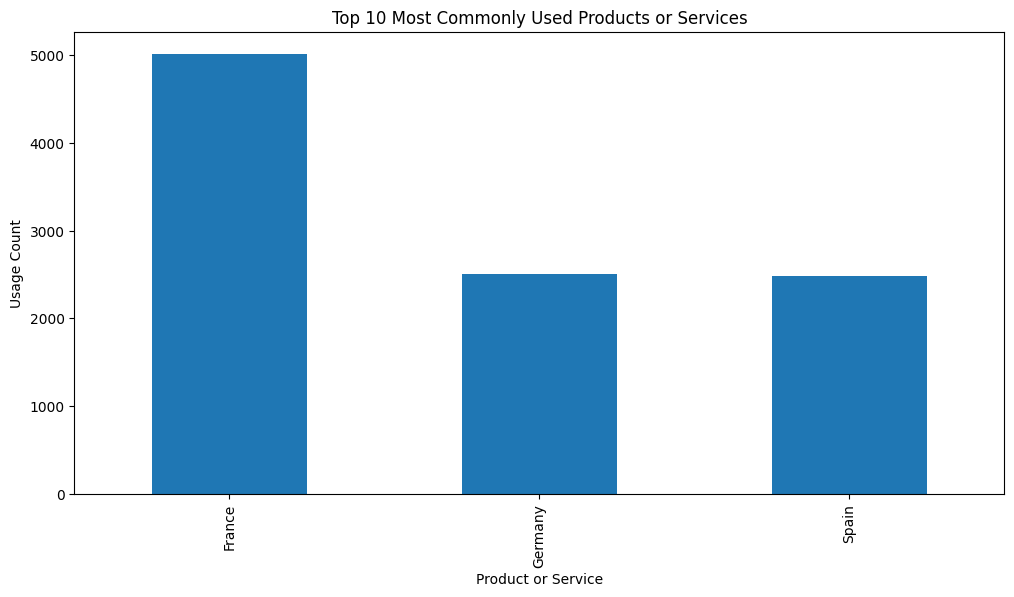

Usage patterns of different customer segments:
Geography  France  Germany  Spain
Gender                           
Female       2261     1193   1089
Male         2753     1316   1388


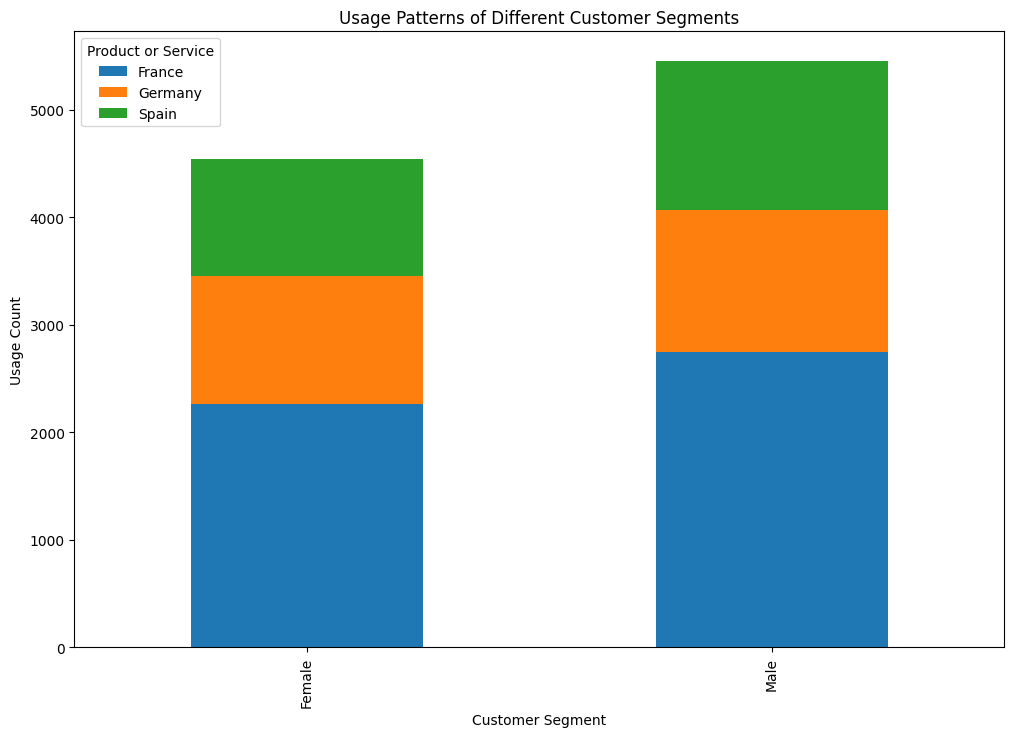

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = 'P3- Churn-Modelling Data.xlsx'

# Read the Excel data into a DataFrame
churn_data = pd.read_excel(file_path)

# Display the first few rows and columns of the dataset to understand its structure
print(churn_data.head())
print(churn_data.columns)

# Churn Analysis
# Calculate churn percentage
total_customers = churn_data.shape[0]
churned_customers = churn_data[churn_data['churned'] == 1].shape[0]
churn_percentage = (churned_customers / total_customers) * 100

print(f"Churn Percentage: {churn_percentage:.2f}%")

# Main reasons for customer churn (assuming 'Geography' and 'Gender' as segments for analysis)
churn_reasons = churn_data[churn_data['churned'] == 1].groupby(['Geography', 'Gender']).size().unstack(fill_value=0)
print("Main reasons for customer churn:")
print(churn_reasons)

# Patterns or trends among customers who have churned
age_churn_pattern = churn_data[churn_data['churned'] == 1]['Age'].describe()
balance_churn_pattern = churn_data[churn_data['churned'] == 1]['Balance'].describe()

print("Age pattern for churned customers:")
print(age_churn_pattern)

print("Balance pattern for churned customers:")
print(balance_churn_pattern)

# Product Usage Analysis
# Most commonly used products or services (assuming 'Geography' as the product)
product_usage = churn_data['Geography'].value_counts()
print("Most commonly used products or services:")
print(product_usage.head(10))

# Plot the most commonly used products or services
product_usage.head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Most Commonly Used Products or Services')
plt.xlabel('Product or Service')
plt.ylabel('Usage Count')
plt.show()

# Analyze the usage patterns of different customer segments (using 'Gender' as segments)
segment_usage = churn_data.groupby('Gender')['Geography'].value_counts().unstack(fill_value=0)
print("Usage patterns of different customer segments:")
print(segment_usage.head(10))

# Plot the usage patterns of different customer segments
segment_usage.head(10).plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Usage Patterns of Different Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Usage Count')
plt.legend(title='Product or Service')
plt.show()


In [1]:
import pandas as pd

# Define the file path
file_path = 'P3- Churn-Modelling Data.xlsx'

# Read the Excel data into a DataFrame
churn_data = pd.read_excel(file_path)

# Financial Analysis
# Average account balance of customers
average_balance = churn_data['Balance'].mean()
print(f"Average Account Balance: {average_balance:.2f}")

# Compare the financial characteristics of churned vs. non-churned customers
financial_comparison = churn_data.groupby('churned').agg({
    'Balance': ['mean', 'median', 'std'],
    'EstimatedSalary': ['mean', 'median', 'std']
})

print("Financial Characteristics Comparison:")
print(financial_comparison)

# Output the results
print("\nAverage Account Balance:")
print(average_balance)

print("\nFinancial Characteristics of Churned vs. Non-Churned Customers:")
print(financial_comparison)


Average Account Balance: 76485.89
Financial Characteristics Comparison:
              Balance                          EstimatedSalary             \
                 mean     median           std            mean     median   
churned                                                                     
0        72745.296779   92072.68  62848.040701    99738.391772   99645.04   
1        91108.539337  109349.29  58360.794816   101465.677531  102460.84   

                       
                  std  
churned                
0        57405.586966  
1        57912.418071  

Average Account Balance:
76485.889288

Financial Characteristics of Churned vs. Non-Churned Customers:
              Balance                          EstimatedSalary             \
                 mean     median           std            mean     median   
churned                                                                     
0        72745.296779   92072.68  62848.040701    99738.391772   99645.04   
1        9

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

# Define the file path
file_path = 'P3- Churn-Modelling Data.xlsx'

# Read the Excel data into a DataFrame
churn_data = pd.read_excel(file_path)

# Select features and target variable
X = churn_data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = churn_data['churned']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Identify significant predictors using logistic regression with statsmodels
X_train_sm = sm.add_constant(X_train_scaled)  # Adds a constant term to the predictor
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

print("\nLogistic Regression Model Summary:")
print(result.summary())

# Predictive modeling: identify at-risk customers
churn_probabilities = logreg.predict_proba(X_test_scaled)[:, 1]
at_risk_customers = X_test[churn_probabilities > 0.5]

print("\nAt-Risk Customers:")
print(at_risk_customers)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000

Confusion Matrix:
[[2318   98]
 [ 468  116]]
Optimization terminated successfully.
         Current function value: 0.433718
         Iterations 6

Logistic Regression Model Summary:
                           Logit Regression Results                           
Dep. Variable:                churned   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6988
Method:                           MLE   Df Model:                           11
Date:                Sat, 06 Jul 2024   Pseudo R-squ.:                  0.1508
Time:                        05:26:51   Log-Likelihood:                -